In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fe-syll/hasil_fe_syll.csv


In [70]:
syll_dataset = pd.read_csv('/kaggle/input/fe-syll/hasil_fe_syll.csv')

In [71]:
#c = syll_dataset['grade']
X = syll_dataset.drop('grade', axis=1)
X = X.drop('text', axis=1)
X.head()

,cvc_density,v_density,cv_density,vc_density,rasio_konsonan,unique_syll
0,0.631579,0.225806,1.714286,0.583333,0.631579,17
1,0.608696,0.209302,1.555556,0.642857,0.608696,16
2,0.636364,0.173913,1.750000,0.571429,0.636364,12
3,0.636364,0.210526,1.750000,0.571429,0.636364,14
4,0.444444,0.294118,0.800000,1.250000,0.444444,12


In [72]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [73]:
from sklearn.model_selection import train_test_split
import numpy as np

In [74]:
y = syll_dataset[['grade']]

In [75]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

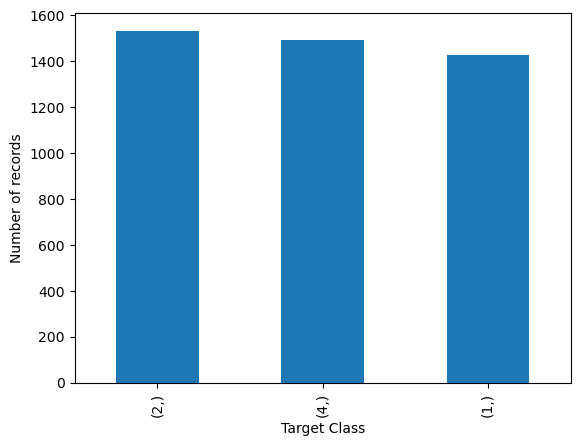

In [77]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [78]:
from sklearn import svm
model = svm.SVC().fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
import matplotlib.pyplot as plt

In [80]:
model_pred = model.predict(X_test)


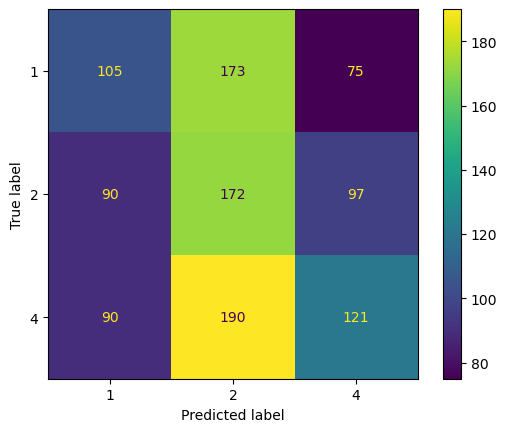

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred, digits=3))

              precision    recall  f1-score   support

           1      0.368     0.297     0.329       353
           2      0.321     0.479     0.385       359
           4      0.413     0.302     0.349       401

    accuracy                          0.358      1113
   macro avg      0.368     0.359     0.354      1113
weighted avg      0.369     0.358     0.354      1113



In [83]:
model_svm = svm.SVC()

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {
#     'C': [1000],
#     'kernel' : ['linear'],
    'decision_function_shape':['ovo', 'ovr'],
    'gamma': [1, 0.1, 0.001]
}

In [85]:

grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.001]})

In [86]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'decision_function_shape': 'ovo', 'gamma': 1}
Best Score:  0.41576819407008087


In [87]:
final_model = svm.SVC(**best_params)


final_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(decision_function_shape='ovo', gamma=1)

In [88]:
accuracy = final_model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.40970350404312667


In [89]:
grid_search_predictions = grid_search.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, grid_search_predictions))


print("Classification Report:")
print(classification_report(y_test, grid_search_predictions, digits=3))

Confusion Matrix:
[[198  71  84]
 [128 119 112]
 [154 108 139]]
Classification Report:
              precision    recall  f1-score   support

           1      0.412     0.561     0.475       353
           2      0.399     0.331     0.362       359
           4      0.415     0.347     0.378       401

    accuracy                          0.410      1113
   macro avg      0.409     0.413     0.405      1113
weighted avg      0.409     0.410     0.404      1113



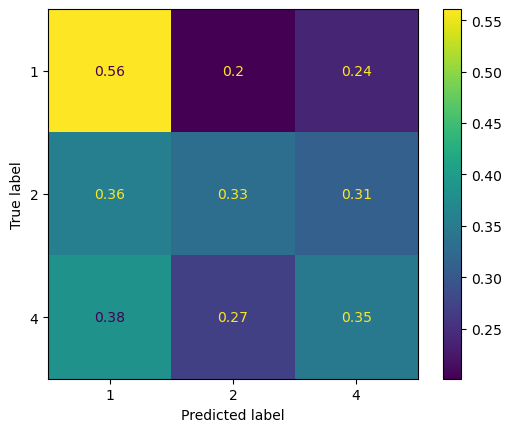

In [90]:
cm_display = ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, normalize='true')

In [92]:
model_2 = svm.SVC(C=1000, kernel = 'linear',  gamma = 1, decision_function_shape='ovo').fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


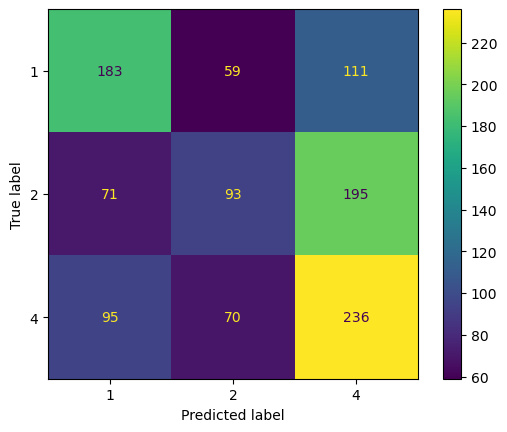

In [93]:
model_pred_2 = model_2.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model_pred_2, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [94]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_pred_2))


print("Classification Report:")
print(classification_report(y_test, model_pred_2, digits=3))

Confusion Matrix:
[[183  59 111]
 [ 71  93 195]
 [ 95  70 236]]
Classification Report:
              precision    recall  f1-score   support

           1      0.524     0.518     0.521       353
           2      0.419     0.259     0.320       359
           4      0.435     0.589     0.501       401

    accuracy                          0.460      1113
   macro avg      0.460     0.455     0.447      1113
weighted avg      0.458     0.460     0.449      1113

